# Newton's Method

It's a root finding algorithm, that uses [Taylor's expansion](../../calculus/taylors_expansion.ipynb). With some function $f$, and an initial guess $x_0$, we approximate the next value with:

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

---
#### A <i>slightly</i> more detailed explanation
Let $x^k$ be the current iteration and consider the `second order taylor approximation` of $f(x)$ at $x^k$, i.e. 

$$g(x) = f(x^k) + \nabla f(x^k)^T(x - x^k) + \frac{1}{2}(x - x^k)\nabla^2 f(x^k)(x - x^k)$$

Choose the next iteration as the solution that minimizes the approximation function $g(x)$

Setting $\nabla g(x) = 0$, we get the linear system:

$$\nabla f(x^k) + \nabla^2f(x^k)(x - x^k) = 0$$

Now we need to solve for $x$
* If the [Hessian](../../calculus/hessian_matrix.ipynb) is `non-singular`, a solution to the above system is well-defined, and we set

$$x^{k+1} = x^k - [\nabla^2f(x_k)]^{-1}\nabla f(x^k)$$

* In this case, the improving direction is
$$d^k = -[\nabla^2 f(x_k)]^{-1}\nabla f(x^k)$$ and the step size $\alpha = 1$

---

How does it perform?

* If started close enough to a `local minimum` and the `Hessian` is positive definite, then the method has a quadratic convergence (READ: fast).
* In general, it is not guaranteed to converge. The Newton direction may not be improving at all
* If the `Hessian` is singular at some iteration, we cannot proceed.
* Computing the `gradient` as well the `Hessian` and its inverse is expensive.  

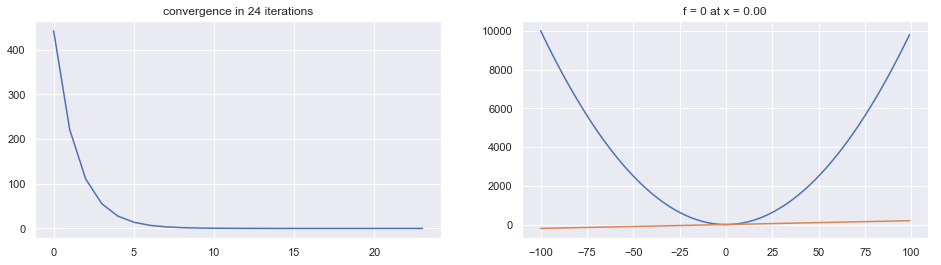

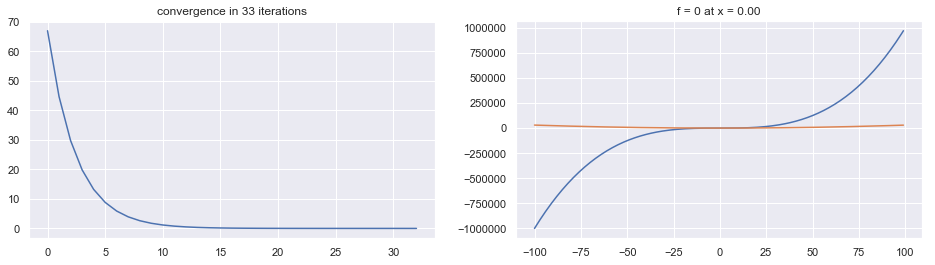

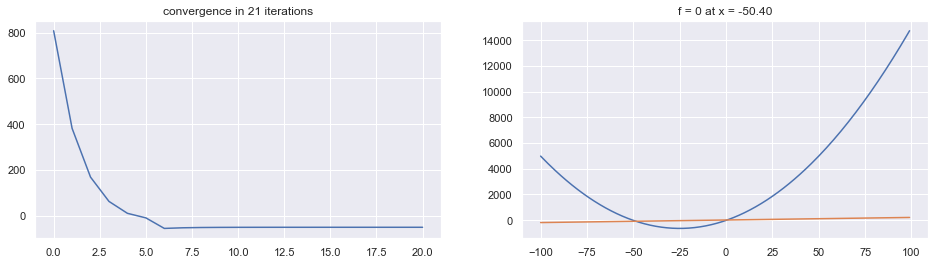

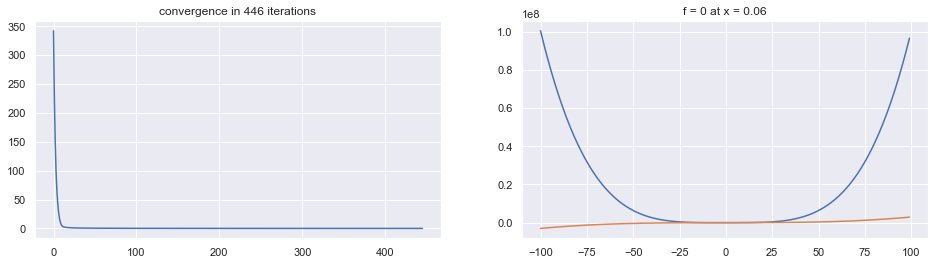

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

def newton(f, f_p, ax, max_iter=1000, eps=1e-4):
    
    x = np.random.randint(1000)
    
    approx = [x]
    x_prev = -1
    
    for _ in range(max_iter):
        if abs(x - x_prev) < eps:
            break
        x_prev = x
        x = x - f(x) / f_p(x)
        approx.append(x)
    
    ax.plot(approx)
    ax.title.set_text(f"convergence in {len(approx)} iterations")
    return x

def plot_newton(f, f_p):
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))
    root = newton(f, f_p, ax[0])
    r = np.arange(-100, 100)

    ax[1].plot(r, list(map(f, r)));
    ax[1].plot(r, list(map(f_p, r)));
    ax[1].title.set_text(f"f = 0 at x = {root:0.2f}")
    
f = lambda x: x ** 2
f_p = lambda x: 2 * x
plot_newton(f, f_p)

f = lambda x: x ** 3
f_p = lambda x: 3 * x ** 2
plot_newton(f, f_p)

f = lambda x: x ** 2 + 50 * x - 20
f_p = lambda x: 2 * x + 10
plot_newton(f, f_p)

f = lambda x: x ** 4 + 50 * x ** 2 - x
f_p = lambda x: 3 * x ** 3 + 100 * 10 - 1
plot_newton(f, f_p)

#### Resources:
* [Wikipedia — Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method)